# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [4]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data=data, index=labels)
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [5]:
print(df.describe())
print()
print(df.info())

            age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [6]:
print(df.iloc[:3])
print()
print(df.head(n=3))

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [7]:
print(df.loc[:, ['animal', 'age']])

  animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [8]:
animal = df.columns.get_loc('animal')
age = df.columns.get_loc('age')
print(df.iloc[[3, 4, 8], [animal, age]])

  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [9]:
print(df[df['visits'] > 2])

  animal  age  visits priority
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no


```Select the rows where the age is missing, i.e. is `NaN`.```

In [10]:
print(df[df['age'].isna()])

  animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [11]:
# print(df.loc[df['animal'].isin(['cat'] & (df['age'] <= 3))])
print(df.loc[(df['animal']=='cat') & (df['age'] <= 3)])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no


```Select the rows the age is between 2 and 4 (inclusive).```

In [12]:
print(df.loc[(df['age'] >= 2) & (df['age'] <= 4)])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


```Change the age in row 'f' to 1.5.```

In [13]:
df.at['f','age'] = 1.5
print(df.loc['f','age'])

1.5


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [14]:
print(df['visits'].sum())
visits = np.array(df['visits'])
print(np.sum(visits))

19
19


```Calculate the mean age for each different animal in `df`.```

In [15]:
animals_visited = dict()
animals = set(df['animal'])
for animal in animals:
    animals_visited[animal] = df[df['animal'] == animal]['age'].mean()
print(animals_visited)

{'dog': 5.0, 'cat': 2.3333333333333335, 'snake': 2.5}


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [16]:
# k = pd.DataFrame([['cow'], [1], [0], ['no']], columns=['animal, age, visits, priority'])
# print(k)
# df.append([{'animal': 'cow'}])
# print(df)
df.at['k'] = ['parrot', 4, 2, 'no']
print(df)
df = df.drop('k')
print()
print(df)

   animal  age  visits priority
a     cat  2.5     1.0      yes
b     cat  3.0     3.0      yes
c   snake  0.5     2.0       no
d     dog  NaN     3.0      yes
e     dog  5.0     2.0       no
f     cat  1.5     3.0       no
g   snake  4.5     1.0       no
h     cat  NaN     1.0      yes
i     dog  7.0     2.0       no
j     dog  3.0     1.0       no
k  parrot  4.0     2.0       no

  animal  age  visits priority
a    cat  2.5     1.0      yes
b    cat  3.0     3.0      yes
c  snake  0.5     2.0       no
d    dog  NaN     3.0      yes
e    dog  5.0     2.0       no
f    cat  1.5     3.0       no
g  snake  4.5     1.0       no
h    cat  NaN     1.0      yes
i    dog  7.0     2.0       no
j    dog  3.0     1.0       no


```Count the number of each type of animal in `df`.```

In [17]:
animals = df['animal']
counting_dict = dict()
for animal in animals:
    counting_dict[animal] = len(df[df['animal'] == animal])
print(counting_dict)

{'cat': 4, 'snake': 2, 'dog': 4}


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [18]:
df = df.sort_values(by=['age', 'visits'], ascending=[False, True])
print(df)

  animal  age  visits priority
i    dog  7.0     2.0       no
e    dog  5.0     2.0       no
g  snake  4.5     1.0       no
j    dog  3.0     1.0       no
b    cat  3.0     3.0      yes
a    cat  2.5     1.0      yes
f    cat  1.5     3.0       no
c  snake  0.5     2.0       no
h    cat  NaN     1.0      yes
d    dog  NaN     3.0      yes


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [19]:
df = df.replace(['yes', 'no'], [True, False])
print(df)

  animal  age  visits  priority
i    dog  7.0     2.0     False
e    dog  5.0     2.0     False
g  snake  4.5     1.0     False
j    dog  3.0     1.0     False
b    cat  3.0     3.0      True
a    cat  2.5     1.0      True
f    cat  1.5     3.0     False
c  snake  0.5     2.0     False
h    cat  NaN     1.0      True
d    dog  NaN     3.0      True


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [20]:
df = df.replace('snake', 'python')
print(df)

   animal  age  visits  priority
i     dog  7.0     2.0     False
e     dog  5.0     2.0     False
g  python  4.5     1.0     False
j     dog  3.0     1.0     False
b     cat  3.0     3.0      True
a     cat  2.5     1.0      True
f     cat  1.5     3.0     False
c  python  0.5     2.0     False
h     cat  NaN     1.0      True
d     dog  NaN     3.0      True


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [21]:
table = df.pivot_table(values='age', index=df['animal'],
                       columns=['visits'], aggfunc=np.mean, dropna=True)
print(table)

visits  1.0  2.0   3.0
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [22]:
num_people = 40

age = np.random.randint(20, 65, num_people)

skill = np.random.normal(0.5, 0.3, num_people)
skill[skill < 0] = np.random.rand(len(skill[skill < 0]))
skill[skill >= 1] = np.random.rand(len(skill[skill > 1]))

height = np.random.uniform(1.5, 2, num_people).astype(np.float)
height = np.around(height, decimals=2)

age_data = np.reshape(age, (num_people, 1))
skill_data = np.reshape(skill, (num_people, 1))
height_data = np.reshape(height, (num_people, 1))

data = np.hstack((age_data, skill_data, height_data))

df2 = pd.DataFrame(data, columns=['age', 'skill', 'height'])

print(df2['age'][2])

42.0


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [23]:
salary = 1000 * ((age**2)/1000 + 1.7*skill + 0.4*np.exp(-(height-1.7)**2))
df2['salary'] = pd.Series(salary, index=df2.index)
print(df2)

     age     skill  height       salary
0   35.0  0.459312    1.87  2394.435795
1   27.0  0.488506    1.56  1951.696704
2   42.0  0.581382    1.75  3151.349885
3   21.0  0.676322    1.78  1988.196116
4   58.0  0.397013    1.51  4424.739063
5   35.0  0.848950    1.82  3062.495583
6   54.0  0.746740    1.66  4584.817777
7   49.0  0.144279    1.94  3023.884650
8   31.0  0.605473    1.88  2377.552178
9   28.0  0.726756    1.92  2400.586479
10  48.0  0.596631    1.74  3717.633842
11  60.0  0.612581    1.83  5034.684608
12  20.0  0.309622    1.98  1296.195845
13  34.0  0.503354    1.97  2383.580140
14  36.0  0.564591    1.68  2655.644375
15  38.0  0.549762    1.72  2778.436085
16  29.0  0.868668    1.74  2717.096306
17  34.0  0.544263    1.78  2478.695762
18  44.0  0.565814    1.55  3288.984039
19  39.0  0.825848    1.90  3309.257179
20  60.0  0.380149    1.65  4645.253709
21  29.0  0.539666    2.00  2124.005372
22  54.0  0.308751    1.90  3825.192008
23  44.0  0.245357    1.83  2746.403160


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [24]:
data3 = {'age' : [], 'numRows': [] , 'meanSalary': [], 'maxHeight': []}
data4 = {'ageLeftDigit' : [], 'numRows': [] , 'meanSalary': [], 'maxHeight': []}

groups3 = df2.groupby(['age'])

for age, group in groups3:
    data3['age'].append(age)
    data3['numRows'].append(len(group))
    data3['meanSalary'].append(group['salary'].mean())
    data3['maxHeight'].append(group['height'].max())

df3 = pd.DataFrame.from_dict(data3, orient='columns')

print(df3)
print()

def get_left_digit(number):
    i=0
    while number > 9:
        number /= 10
    return int(number)


def get_new_column(series1):
    from copy import deepcopy
    series = deepcopy(series1)
    for i in range(len(series)):
        num = series[i]
        num = get_left_digit(num)
        series[i] = num
    return series

ageLeftDigit = get_new_column(df2['age'])
df2['ageLeftDigit'] = pd.Series(ageLeftDigit, index=df2.index)

groups4 = df2.groupby('ageLeftDigit')

for age_left_digit, group in groups4:
    data4['ageLeftDigit'].append(age_left_digit)
    data4['numRows'].append(len(group))
    data4['meanSalary'].append(group['salary'].mean())
    data4['maxHeight'].append(group['height'].max())


df4 = pd.DataFrame.from_dict(data4, orient='columns')

print(df4)


 

     age  numRows   meanSalary  maxHeight
0   20.0        1  1296.195845       1.98
1   21.0        1  1988.196116       1.78
2   22.0        1  1252.971314       1.69
3   26.0        2  1794.498101       1.96
4   27.0        2  1573.765885       1.67
5   28.0        2  2151.888210       1.92
6   29.0        3  2358.909514       2.00
7   31.0        1  2377.552178       1.88
8   32.0        1  3048.827213       1.74
9   34.0        4  2443.610712       1.99
10  35.0        2  2728.465689       1.87
11  36.0        1  2655.644375       1.68
12  38.0        1  2778.436085       1.72
13  39.0        1  3309.257179       1.90
14  40.0        2  3198.867409       1.82
15  41.0        1  2652.953487       1.92
16  42.0        1  3151.349885       1.75
17  44.0        2  3017.693600       1.83
18  45.0        1  3683.767404       1.85
19  46.0        1  3485.497440       1.73
20  48.0        1  3717.633842       1.74
21  49.0        2  3057.040233       1.94
22  54.0        2  4205.004892    

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [25]:
data5 = {'age': [], 'salary/height': []}
groups = df2.groupby(['age'])
for age, group in groups:
    data5['age'].append(age)
    data5['salary/height'].append(group['salary'].mean() / group['height'].sum())
df5 = pd.DataFrame.from_dict(data5, orient='columns')

print(df5)

     age  salary/height
0   20.0     654.644366
1   21.0    1116.964110
2   22.0     741.403144
3   26.0     474.734947
4   27.0     487.234020
5   28.0     566.286371
6   29.0     430.457941
7   31.0    1264.655414
8   32.0    1752.199548
9   34.0     318.178478
10  35.0     739.421596
11  36.0    1580.740699
12  38.0    1615.369817
13  39.0    1741.714305
14  40.0     893.538382
15  41.0    1381.746608
16  42.0    1800.771363
17  44.0     892.808757
18  45.0    1991.225624
19  46.0    2014.738405
20  48.0    2136.571174
21  49.0     844.486252
22  54.0    1181.181150
23  58.0    2930.290770
24  60.0    1390.795735
25  64.0    2754.973220


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

plot:


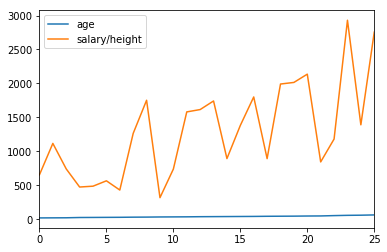

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
        
print('plot:')
df5.plot()

```Save the result as a csv```

In [0]:
df5.to_csv('limonanaEx1')

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')
print(df)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          NaN    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20          NaN   

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [30]:
# oldest house:
print(df[df['YearBuilt'] == df['YearBuilt'].min()])

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1349  1350          70         50.0     5250            8            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
1349       1872          1987         0.0         259  ...           0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1349           54             20          0            0         0        0   

      MoSold  YrSold  SalePrice  
1349      12    2008     122000  

[1 rows x 38 columns]


In [31]:
# hieghest price in that year:
print(df[df['YearBuilt'] == df['YearBuilt'].min()]['SalePrice'].max())

122000


In [32]:
# mean area:
print(df['LotArea'].mean())

10516.828082191782


In [33]:
# median:
print(df['LotArea'].median())

9478.5


In [34]:
houses_with_fireplace = len(df[df['Fireplaces'] > 0])
houses_without_fireplace = len(df[df['Fireplaces'] == 0])
if houses_with_fireplace > houses_without_fireplace:
    print('more houses with fireplace')
elif houses_with_fireplace == houses_without_fireplace:
    print('same number')
else:
    print('more houses without fireplace')
        

more houses with fireplace


In [35]:
# mean price of houses with pool:
print(df[df['PoolArea'] > 0]['SalePrice'].mean())

288138.5714285714


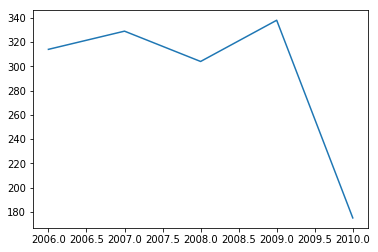

In [36]:
# houses per year:
groups = df.groupby('YrSold')
data = []
for year, group in groups:
    data.append((year, len(group)))
data = sorted(data, key=lambda x: x[0])
years = [data[i][0] for i in range(len(data))]
num_houses = [data[i][1] for i in range(len(data))]
plt.plot(years, num_houses)

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')